In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mutual_info_score
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split


%matplotlib inline

# Import Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

In [3]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


## Preparing the dataset

In [4]:
subset_cols = [ 'Make',
                'Model',
                'Year',
                'Engine HP',
                'Engine Cylinders',
                'Transmission Type',
                'Vehicle Style',
                'highway MPG',
                'city mpg',
                'MSRP']

In [5]:
subset = df[subset_cols]

In [6]:
subset.columns = subset.columns.str.replace(' ', '_').str.lower()
subset = subset.rename(columns={'msrp': 'price'})
subset

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [7]:
subset.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
price                 0
dtype: int64

In [8]:
subset = subset.fillna(0)
subset.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

In [9]:
for col in subset.columns:
    print(col)
    display(subset[col].nunique())
    print()

make


48


model


915


year


28


engine_hp


357


engine_cylinders


9


transmission_type


5


vehicle_style


16


highway_mpg


59


city_mpg


69


price


6049

### Question 1

What is the most frequent observation (mode) for the column transmission_type?

In [10]:
subset.transmission_type.value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64

Answer: AUTOMATIC

### Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


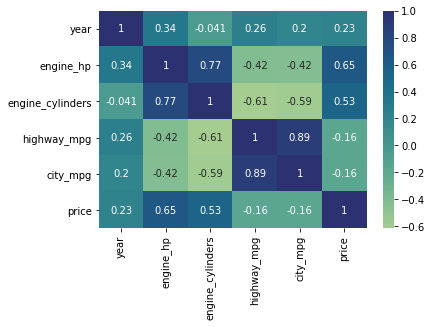

In [11]:
corr_matrix = subset.corr(numeric_only=True)
display(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='crest');

Answer: highway_mpg and city_mpg

## Make price binary

* Now we need to turn the price variable from numeric into a binary format.
* Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.

In [12]:
subset['above_average'] = (subset.price > subset.price.mean()).astype(int)
subset

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


## Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
* Make sure that the target value (above_average) is not in your dataframe.

In [13]:
df_features = subset.drop(['price', 'above_average'], axis=1)
df_target = subset['above_average']

In [14]:
feature_train, feature_val, target_train, target_val = train_test_split(df_features, df_target, random_state=42, test_size=0.2)
feature_train, feature_test, target_train, target_test = train_test_split(feature_train, target_train, random_state=42, test_size=0.25)

print(*(len(i) for i in [feature_train, target_train, feature_val, target_val, feature_test, target_test]))

7148 7148 2383 2383 2383 2383


In [15]:
feature_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
3972,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15
1997,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17
5216,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12
2805,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20
11369,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20
...,...,...,...,...,...,...,...,...,...
9232,Toyota,Sienna,2016,266.0,6.0,AUTOMATIC,Passenger Minivan,25,18
5710,Chevrolet,HHR,2009,260.0,4.0,MANUAL,Wagon,29,21
11306,Hyundai,Veracruz,2012,260.0,6.0,AUTOMATIC,4dr SUV,22,17
4414,Mitsubishi,Expo,1993,136.0,4.0,MANUAL,2dr Hatchback,26,19


In [16]:
for x in [feature_train, target_train, feature_val, target_val, feature_test, target_test]:
    x.reset_index(drop=True, inplace=True)
feature_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15
1,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17
2,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12
3,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20
4,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20
...,...,...,...,...,...,...,...,...,...
7143,Toyota,Sienna,2016,266.0,6.0,AUTOMATIC,Passenger Minivan,25,18
7144,Chevrolet,HHR,2009,260.0,4.0,MANUAL,Wagon,29,21
7145,Hyundai,Veracruz,2012,260.0,6.0,AUTOMATIC,4dr SUV,22,17
7146,Mitsubishi,Expo,1993,136.0,4.0,MANUAL,2dr Hatchback,26,19


### Question 3

* Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
* Round the scores to 2 decimals using round(score, 2).
* Which of these variables has the lowest mutual information score?

In [17]:
categorical = list(df_features.dtypes[df_features.dtypes == 'object'].index)
categorical

['make', 'model', 'transmission_type', 'vehicle_style']

In [18]:
pd.Series({col: round(mutual_info_score(feature_train[col], target_train), 2) for col in categorical}).sort_values()

transmission_type    0.02
vehicle_style        0.08
make                 0.24
model                0.46
dtype: float64

Answer: transmission_type is lowest

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters: 
    * model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

#### OHE

In [19]:
dv = DictVectorizer(sparse=False)

train_dict = feature_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)


val_dict = feature_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

#### Linear Regression

In [20]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [21]:
model.fit(X_train, target_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [22]:
w0 = model.intercept_[0]

In [23]:
w = model.coef_[0].round(3)

In [24]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([2.40294932e-02, 1.74497118e-03, 2.72137563e-01, ...,
       8.08660827e-03, 8.51468590e-04, 9.53758490e-01])

In [25]:
pred_above_avg = y_pred >= 0.5

In [26]:
base_accurancy = (target_val == pred_above_avg).mean().round(2)
base_accurancy

0.95

In [27]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = pred_above_avg.astype(int)
df_pred['actual'] = target_val
df_pred['correct'] = df_pred.prediction == df_pred.actual

Answer: 0.95

### Question 5


* Let's find the least useful feature using the feature elimination technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

In [28]:
featutes = list(feature_train.columns)
featutes

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg']

In [31]:
for i in range(len(featutes)):
    short_features = list(set(featutes) - set([featutes[i]]))
    
    dv = DictVectorizer(sparse=False)
    train_dict = feature_train[short_features].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    val_dict = feature_val[short_features].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, target_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    pred_above_avg = y_pred >= 0.5
    accurancy = (target_val == pred_above_avg).mean().round(4)
    print(f'Accurancy without {featutes[i]} = {accurancy}')
    print(f'Diffrecne = {(base_accurancy - accurancy).round(4)}')  
    
        

Accurancy without make = 0.945
Diffrecne = 0.005
Accurancy without model = 0.9253
Diffrecne = 0.0247


Accurancy without year = 0.9501
Diffrecne = -0.0001
Accurancy without engine_hp = 0.9308
Diffrecne = 0.0192
Accurancy without engine_cylinders = 0.9517
Diffrecne = -0.0017
Accurancy without transmission_type = 0.9484
Diffrecne = 0.0016
Accurancy without vehicle_style = 0.9404
Diffrecne = 0.0096
Accurancy without highway_mpg = 0.9492
Diffrecne = 0.0008
Accurancy without city_mpg = 0.9509
Diffrecne = -0.0009


Answer: city_mpg

### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column price. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
* This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
* Round your RMSE scores to 3 decimal digits.
* Which of these alphas leads to the best RMSE on the validation set?

In [32]:
df_features = subset.drop(['price', 'above_average'], axis=1)
df_target = np.log1p(subset['price'])

In [33]:
feature_train, feature_val, target_train, target_val = train_test_split(df_features, df_target, random_state=42, test_size=0.2)
feature_train, feature_test, target_train, target_test = train_test_split(feature_train, target_train, random_state=42, test_size=0.25)

print(*(len(i) for i in [feature_train, target_train, feature_val, target_val, feature_test, target_test]))

7148 7148 2383 2383 2383 2383


In [36]:
for x in [feature_train, target_train, feature_val, target_val, feature_test, target_test]:
    x.reset_index(drop=True, inplace=True)
target_test

0       10.263816
1       11.005444
2        9.908027
3       10.576968
4        7.601402
          ...    
2378    10.023313
2379    10.331888
2380     9.997479
2381    11.725582
2382    10.877500
Name: price, Length: 2383, dtype: float64

In [37]:
dv = DictVectorizer(sparse=False)
train_dict = feature_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
val_dict = feature_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [39]:
best_rmse = 1000000
best_alpha = 0
for alpha in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(solver='sag', alpha=alpha, random_state=42)
    model.fit(X_train, target_train)
    pred = model.predict(X_val)
    rmse = mean_squared_error(np.expm1(target_val), np.expm1(pred), squared=False).round(2)
    print(f'RMSE with alpha {alpha} = {rmse}')
    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha
print(f'Best RMSE = {best_rmse} with alpha {best_alpha}')

RMSE with alpha 0 = 31379.38
RMSE with alpha 0.01 = 31379.4
RMSE with alpha 0.1 = 31379.52
RMSE with alpha 1 = 31380.77
RMSE with alpha 10 = 31399.68
Best RMSE = 31379.38 with alpha 0


Answer: 0